# GPU Computing for Data Scientists
## 04 Basic Image Processing with PyCUDA
#### Using CUDA, Jupyter, PyCUDA, ArrayFire and Thrust


https://github.com/QuantScientist/Data-Science-ArrayFire-GPU

In [1]:
# !pip install pycuda
%reset -f
import numpy
import numpy as np

# imports
import numpy as np                     # numeric python lib
import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour
import scipy.ndimage as ndi            # to determine shape centrality
# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots

import tensorflow as tf 
print("tensorflow:" + tf.__version__)
!set "KERAS_BACKEND=tensorflow"

import numpy as np
import matplotlib.pyplot as plt

import caffe
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from caffe import layers as L
from caffe import params as P
caffe.set_device(0)
caffe.set_mode_gpu()
# http://christopher5106.github.io/deep/learning/2015/09/04/Deep-learning-tutorial-on-Caffe-Technology.html

tensorflow:1.2.1


# Init CUDA

-  Maximum thread size for GPU is dependent on GPU, but normally 512.
-  Threads per block should be a multiple of 32.
-  Block and Grid Size is dependent on the image.
-  This example uses a 256x256 pixel image. A 2D block (16x16) and a 1D grid (256,1) is used

## Python CPU image processing

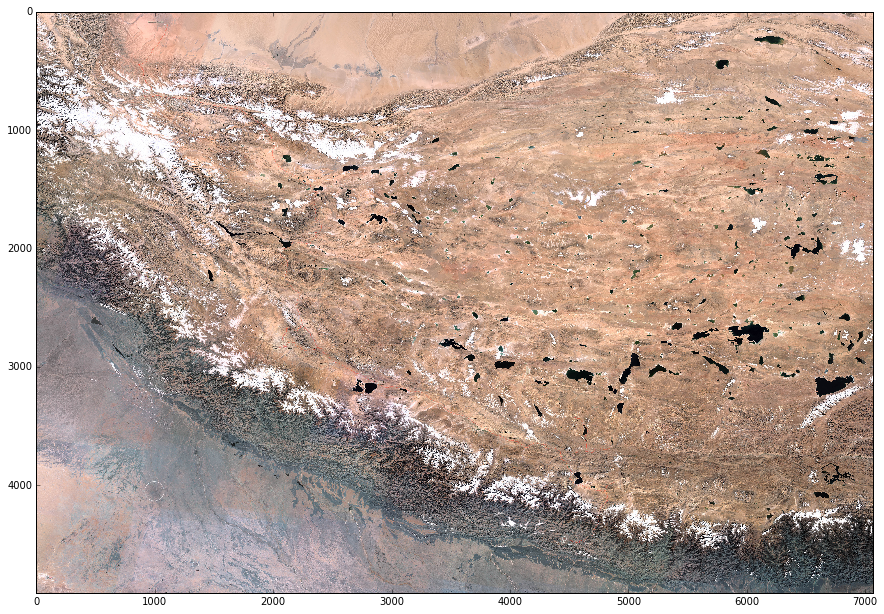

In [31]:
from PIL import Image, ImageFilter
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plot   # Library to plot
import matplotlib.cm as colormap   # Library to plot
%matplotlib inline

#Read image
im = Image.open('images/test40mb.jpg')
figure = plot.figure()
figure.set_size_inches(15, 15)
# plot.imshow(data)
#Display image
imshow(np.asarray(im))

# PyCuda: Calculate block size

In [13]:
from pycuda.compiler import SourceModule
import pycuda
from pycuda import compiler
import pycuda.driver as cuda

import pycuda.autoinit

print("%d device(s) found." % cuda.Device.count())           
for ordinal in range(cuda.Device.count()):
    dev = cuda.Device(ordinal)
    print "Device #%d: %s" % (ordinal, dev.name())    
print cuda

1 device(s) found.
Device #0: GeForce GTX 1080
<module 'pycuda.driver' from '/usr/local/lib/python2.7/dist-packages/pycuda/driver.pyc'>
